## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
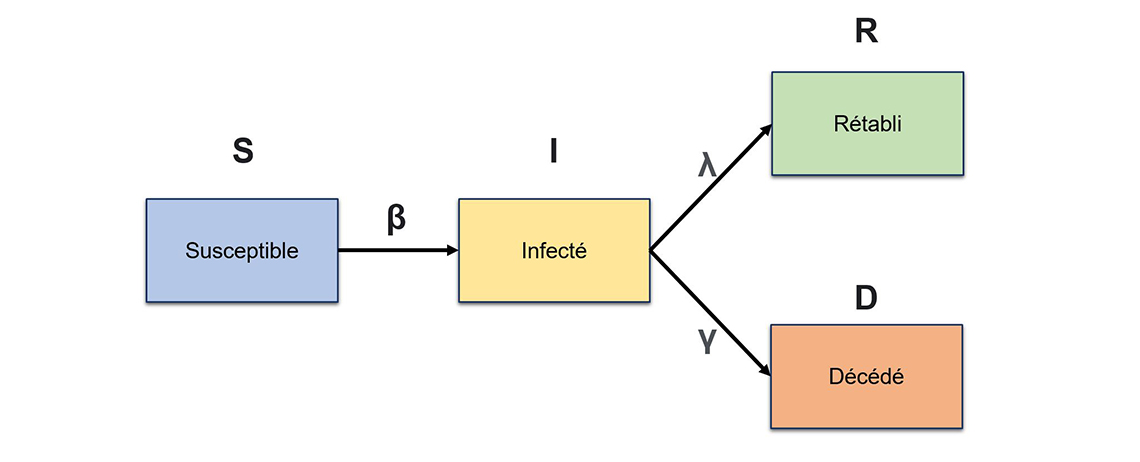


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

\begin{align*}
\frac{S_{i+1} - S_{i}}{\text{step}} &= -\beta \cdot S_{i} \cdot I_{i}
S_{i+1} &= -\text{step} \cdot \beta \cdot S_{i} \cdot I_{i}
-S_{i} &= -S_{i}(\text{step} \cdot \beta + 1)
\end{align*}


\begin{align*}
\frac{I_{i+1} - I_{i}}{\text{step}} &= \beta \cdot S_{i} \cdot I_{i} \cdot (-\gamma I_{i}) - \mu I_{i}
I_{i+1} &= \text{step} \cdot \beta \cdot S_{i} \cdot I_{i} \cdot (-\gamma I_{i}) - \mu I_{i}
-I_{i} &= -I_{i}(\text{step} \cdot \beta \cdot S_{i} \cdot \gamma + \mu + 1)
\end{align*}


\begin{align*}
\frac{R_{i+1} - R_{i}}{\text{step}} &= \gamma \cdot I_{i}
R_{i+1} &= \text{step} \cdot \gamma \cdot I_{i}
\end{align*}

\begin{align*}
\frac{D_{i+1} - D_{i}}{\text{step}} &= \mu \cdot I_{i}
D_{i+1} &= \text{step} \cdot \mu \cdot I_{i}
\end{align*}


 # 0 Discretiser le système d'équations différentielles
(S[i+1] - S[i])/step = -beta * S[i] * I[i]                                     S[i+1] = -step * beta * S[i] * I[i] + S[i] = -S[i](step*beta*I[i] - 1)

(I[i+1] - I[i])/step = beta * S[i] * I[i] - gamma*I[i] - mu*I[i]               I[i+1] = step * beta * S[i] * I[i] - gamma*I[i] - mu*I[i] + I[i] = I[i](step * beta * S[i] - gamma - mu + 1)

 (R[i+1] - R[i])/step = gamma * I[i]                                            R[i+1] = step * gamma * I[i] + R[i]

 (D[i+1] - D[i])/step = mu * I[i]                                               D[i+1] = step * mu * I[i] + D[i]



\begin{align*}
\frac{S_{i+1} - S_{i}}{\text{step}} &= -\beta \cdot S_{i} \cdot I_{i}
S_{i+1} &= -\text{step} \cdot \beta \cdot S_{i} \cdot I_{i} + S_{i}
S_{i+1} &= -S_{i}(\text{step} \cdot \beta \cdot I_{i} - 1)
\end{align*}

\begin{align*}
\frac{I_{i+1} - I_{i}}{\text{step}} &= \beta \cdot S_{i} \cdot I_{i} - \gamma I_{i} - \mu I_{i}
I_{i+1} &= \text{step} \cdot \beta \cdot S_{i} \cdot I_{i} - \gamma I_{i} - \mu I_{i} + I_{i}
I_{i+1} &= I_{i}(\text{step} \cdot \beta \cdot S_{i} - \gamma - \mu + 1)
\end{align*}

\begin{align*}
\frac{R_{i+1} - R_{i}}{\text{step}} &= \gamma \cdot I_{i}
R_{i+1} &= \text{step} \cdot \gamma \cdot I_{i} + R_{i}
\end{align*}

\begin{align*}
\frac{D_{i+1} - D_{i}}{\text{step}} &= \mu \cdot I_{i}
D_{i+1} &= \text{step} \cdot \mu \cdot I_{i} + D_{i}
\end{align*}

 # 1 implémentation de la méthode d'Euler

In [15]:
#1
β  = 0.5
γ  = 0.15
μ  = 0.015


S0 = 0.99
I0 = 0.01
R0 = 0.00
D0 = 0.00
step = 0.01
n_jours = 90

nb_step= int(1*n_jours)/step
def modele_SIRD(S0,I0,R0,D0, beta, gama, mu, step, nb_jours):
  nb_step= int(1*n_jours)/step
  S = [S0]
  I = [I0]
  R = [R0]
  D = [D0]
  for i in range(0, nb_step):

    S.append(S[1] - (beta * S[1] * I[1]) * step)
    I.append(I[1] + ((beta * S[1] * I[1]) - (gamma * I[1]) - (mu * I[1])) * step)
    R.append(R[1] + (gamma * I[1]) * step)
    D.append(D[1] + (mu * I[0]) * step)

  return S, I, R, D


### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Chemin
import pandas as pd
path = '/content/drive/My Drive/sird_dataset.csv'

# Charger les données avec pandas
dataset = pd.read_csv(path)

In [8]:
dataset

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,-0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


In [17]:
import math

def modele_SIRD(S0, I0, R0, D0, beta, gamma, mu, step, nb_jours):
    nb_step = math.ceil(1 * nb_jours / step)
    S = [S0]
    I = [I0]
    R = [R0]
    D = [D0]
    for i in range(0, nb_step):
        S.append(S[i] - (beta * S[i] * I[i]) * step)
        I.append(I[i] + ((beta * S[i] * I[i]) - (gamma * I[i]) - (mu * I[i])) * step)
        R.append(R[i] + (gamma * I[i]) * step)
        D.append(D[i] + (mu * I[i]) * step)
    return S, I, R, D

In [18]:
#1
S, I, R, D = modele_SIRD(0.99, 0.01, 0.00, 0.00,0.5, 0.15, 0.015, 0.01, 90)

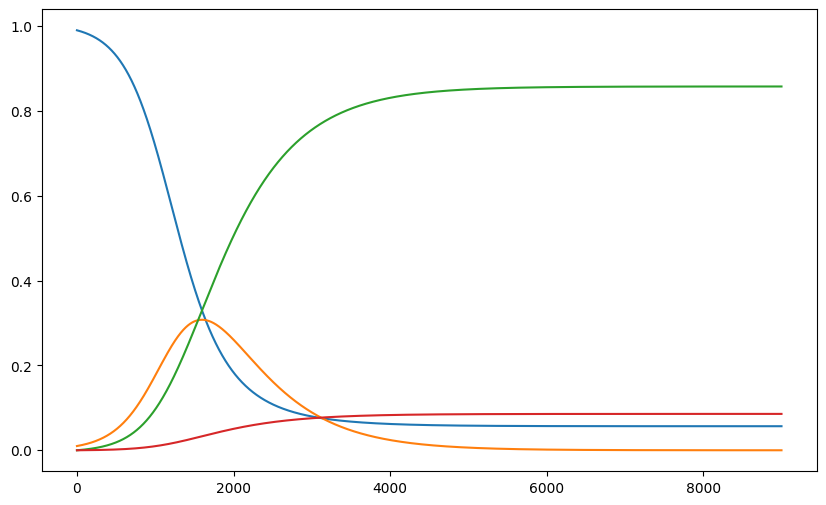

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptibles')
plt.plot(I, label='Infectés')
plt.plot(R, label='Rétablis')
plt.plot(D, label='Décédés')
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [22]:
#1
dataset

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894
...,...,...,...,...,...
85,85,0.072998,0.004650,0.829414,0.079243
86,86,0.077714,-0.005786,0.846965,0.085430
87,87,0.073599,0.010464,0.844571,0.084902
88,88,0.074212,0.004219,0.836580,0.076309


In [25]:
len(dataset)

90

##2 On utilise un RMSE au detriment d'un CCE parce qu'on veut mesurer l'écart entre les données observées et les predictions. Inversement, la Cross-Entropy Error (CCE) est utilisée dans le cadre d'une classification (multi-classes)

In [43]:
import numpy as np
def loss_fonction(predict_values, dataset):
	return np.sqrt(sum((predict_values - dataset)**2)/len(dataset))

In [28]:
dataset.columns

Index(['Jour', 'Susceptibles', 'Infectés', 'Rétablis', 'Décès'], dtype='object')

In [44]:
def grid_search(dataset, step, n_jours):
    possible_values = [1/3, 1/8, 0.005]

    best_beta, best_gamma, best_mu = 1/3, 1/3, 1/3
    best_rmse = float("inf")

    for beta in possible_values:
        for gamma in possible_values:
            for mu in possible_values:
                S0, I0, R0, D0 = modele_SIRD(dataset["Susceptibles"], dataset["Infectés"], dataset["Rétablis"], dataset["Décès"], beta, gamma, mu, step, n_jours)
                rmse = (loss_fonction(S0, dataset["Susceptibles"]) + loss_fonction(I0, dataset["Infectés"]) + loss_fonction(R0, dataset["Rétablis"]) + loss_fonction(D0, dataset["Décès"])) / 4

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_beta, best_gamma, best_mu = beta, gamma, mu

    return best_beta, best_gamma, best_mu, best_rmse

In [45]:
best_beta, best_gamma, best_mu, best_rmse = grid_search(dataset, step, n_jours)

S0, I0, R0, D0 = modele_SIRD(best_beta, best_gamma, best_mu, S0, I0, R0, D0, step, n_jours)


show_result(dataset)
print(best_beta, best_gamma, best_mu, best_rmse)


ValueError: Length of values (9001) does not match length of index (90)

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.
Lorsque Ro<0, cela signifie qu'une personne malade (infectée) peut contaminer moins d'une personne.

Lorsque Ro>1,cela signifie qu'une personne malade (infectée) peut contaminer d'une ou plusieurs personnes.

Ce paramètre a été determinant dans la prise de décision du gouvernement dans la mesure où il permet de statuer sur le confinement et deconfinement.

In [ ]:
#2
dataset

3.